# Allocative Efficiency

range1 = (10, 190)

supply_schedule = [ {'from':start_time, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}]

range1 = (10, 190)

demand_schedule = [ {'from':start_time, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}]

order_sched = {'sup':supply_schedule, 'dem':demand_schedule, 'interval':30, 'timemode':'periodic'}

In [225]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps

In [229]:
bids = []
asks = []

with open('lob.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        for quote in row:
            if quote[:3] == 'Bid':
                bids.append(float(quote[4:]))
            elif quote[:3] == 'Ask':
                asks.append(float(quote[4:]))

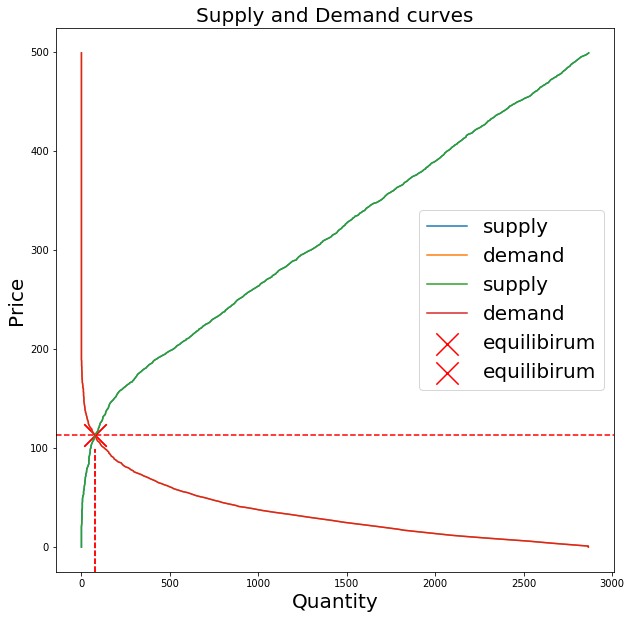

In [249]:
supply_prices = np.arange(0, max(asks))
demand_prices = np.arange(0, max(asks))
supply = []
demand = []

for price in supply_prices:
    quantity = 0
    for ask in asks:
        if ask <= price:
            quantity += 1
    supply.append(quantity)
    
for price in demand_prices:    
    quantity = 0
    for bid in bids:
        if bid >= price:
            quantity += 1
    demand.append(quantity)
    
plt.figure(1, figsize=(10,10))                
plt.plot(supply, supply_prices, label='supply') 
plt.plot(demand, demand_prices, label='demand')

plt.title("Supply and Demand curves", fontsize=20)
plt.xlabel("Quantity", fontsize=20)
plt.ylabel("Price", fontsize=20)
# plt.ylim(ymin=0, ymax=200)
# plt.xlim(xmin=0, xmax=200)

#  find equilibrium

# pointer = 0
# threshold = 5
best = 0

# while abs(supply[pointer] - demand[pointer]) > threshold :

for pointer in range(min(len(supply), len(demand))):
    
    if abs(supply[pointer] - demand[pointer]) < abs(supply[best] - demand[best]):
        best = pointer
    
#     pointer += 1
    
#     if pointer > len(supply) or pointer > len(demand):
#         print("unable to find points within range")
#         break
        

# print(supply[pointer], demand[pointer], supply_prices[pointer], demand_prices[pointer])

plt.scatter(supply[best], supply_prices[best], marker = 'x', c='red', s=500, label='equilibirum')

plt.axvline(x=supply[best], linestyle='--', ymax=(supply_prices[best]/max(asks)), c='red')
plt.axhline(y=supply_prices[best], linestyle='--', xmax=1, c='red')

plt.legend(prop={'size': 20})
plt.show()

In [241]:
ys = np.array(supply[:pointer])
consumer_surplus = np.trapz(ys, dx=1)
print("Trapz consumer surplus: ", consumer_surplus)
consumer_surplus = simps(ys, dx=1)
print("Simps consumer surplus: ", consumer_surplus)


ys = np.array(demand[pointer:])
producer_surplus = np.trapz(ys, dx=1)
print("Trapz producer surplus: ", producer_surplus)
producer_surplus = simps(ys, dx=1)
print("Simps producer surplus: ", producer_surplus)


print("Maximum total profit: ", producer_surplus + consumer_surplus)

started = 0
start_balance = 0
end_balance = 0
with open('avg_balance.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        if not started:
            start_balance = float(row[3])
            started = 1 
        end_balance = float(row[3])

total_profit = end_balance - start_balance
print("Total profit earned: ", total_profit)

allocative_efficiency = (total_profit / (producer_surplus + consumer_surplus)) * 100

print("Allocative efficiency: ", allocative_efficiency)

Trapz consumer surplus:  2253.5
Simps consumer surplus:  2253.25
Trapz producer surplus:  1572.0
Simps producer surplus:  1571.66666667
Maximum total profit:  3824.91666667
Total profit earned:  6882.0
Allocative efficiency:  179.925488573


In [121]:
bids = []
asks = []

with open('lob.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        
        index = 1
        dump = 0
        while index < len(row)-1:
            if row[index] == 'BID_lob':
                dump = 0
                index += 1
            if row[index] == 'ASK_lob':
                dump = 1
                index += 1
            else:
                if dump == 0:
                    bids.append([float(row[index]), float(row[index+1])])
                    index += 2
#                         max_price = max(float(row[index]), max_price)
                elif dump == 1:
                    asks.append([float(row[index]), float(row[index+1])])
                    index += 2
#                         max_price = max(float(row[index]), max_price)
            
            
print(bids, '\n')
print(asks, '\n')

[[38.0, 1.0], [38.0, 1.0], [25.0, 1.0], [25.0, 1.0], [77.0, 1.0], [77.0, 1.0], [77.0, 1.0], [77.0, 1.0], [2.0, 1.0], [2.0, 1.0], [2.0, 1.0], [2.0, 1.0], [2.0, 1.0], [4.0, 1.0], [2.0, 1.0], [4.0, 1.0], [2.0, 1.0], [4.0, 1.0], [15.0, 1.0], [2.0, 1.0], [4.0, 1.0], [15.0, 1.0], [4.0, 1.0], [15.0, 1.0], [89.0, 1.0], [4.0, 1.0], [15.0, 1.0], [89.0, 1.0], [4.0, 1.0], [15.0, 1.0], [89.0, 1.0], [4.0, 1.0], [15.0, 1.0], [89.0, 1.0], [4.0, 1.0], [67.0, 1.0], [89.0, 1.0], [4.0, 1.0], [67.0, 1.0], [89.0, 1.0], [4.0, 1.0], [67.0, 1.0], [89.0, 1.0], [4.0, 1.0], [67.0, 1.0], [89.0, 1.0], [4.0, 1.0], [62.0, 1.0], [89.0, 1.0], [4.0, 1.0], [62.0, 1.0], [89.0, 1.0], [4.0, 1.0], [62.0, 1.0], [76.0, 1.0], [4.0, 1.0], [62.0, 1.0], [76.0, 1.0], [4.0, 1.0], [62.0, 1.0], [76.0, 1.0], [4.0, 1.0], [62.0, 1.0], [76.0, 1.0], [4.0, 1.0], [62.0, 1.0], [76.0, 1.0], [4.0, 1.0], [62.0, 1.0], [76.0, 1.0], [4.0, 1.0], [37.0, 1.0], [62.0, 1.0], [4.0, 1.0], [37.0, 1.0], [62.0, 1.0], [4.0, 1.0], [43.0, 1.0], [62.0, 1.0], [4.

In [240]:
maxask = 0
minask = 1000
for ask in asks:
    maxask=max(ask[0], maxask)
    minask=min(ask[0], minask)
print(minask, maxask)
maxbid = 0
minbid = 1000
for bid in bids:
    maxbid=max(bid[0], maxbid)
    minbid=min(bid[0], minbid)
print(minbid, maxbid)

supply_prices = np.arange(0, maxask)
demand_prices = np.arange(0, maxbid)
supply = []
demand = []

for price in supply_prices:
    quantity = 0
    for ask in asks:
        if ask[0] <= price:
            quantity += ask[1]
    supply.append(quantity)
    
for price in demand_prices:    
    quantity = 0
    for bid in bids:
        if bid[0] >= price:
            quantity += bid[1]
    demand.append(quantity)
    
plt.figure(1, figsize=(10,10))                
plt.plot(supply, supply_prices, label='supply') 
plt.plot(demand, demand_prices, label='demand')
plt.legend(prop={'size': 20})
plt.title("Supply and Demand curves", fontsize=20)
plt.xlabel("Quantity", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.ylim(ymin=0, ymax=200)
plt.xlim(xmin=0, xmax=200)
plt.show()

TypeError: 'float' object is not subscriptable

In [206]:
test = [1,2,3]
test[2:]

[3]